# FOREST FIRE PREDICTION - Project
## Aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data 
### DATASET DOWNLOADED: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
# IMPORTING PYTHON LIBRARIES ( NUMPY , PANDAS , MATPLOLIB , SEABORN )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# IMPORTING CSV FILE (forestfires.csv) USING PANDAS

In [4]:
data_set=pd.read_csv("forestfires.csv")

In [5]:
# CONVERTING IMPORTED DATA SET TO DATA FRAME USING PANDAS

In [6]:
data_frame=pd.DataFrame(data_set)

In [7]:
# DISPLAYING DATA FRAME

In [8]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [9]:
# X = x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y = y-axis spatial coordinate within the Montesinho park map: 2 to 9
# month = Month of the Year: 'jan' to 'dec'
# day = Day of the week in the month mentioned in previous column: 'mon' to 'sun'
# FFMC = FINE FUEL MOISTURE CODE. FFMC Index from the FWI system: 18.7 to 96.20
# DMC = DUFF MOISTURE CODE. DMC Index from the FWI System: 1.1 to 291.3
# DC = DROUGHT CODE. DC Index from the FWI System: 7.9 to 860.6
# ISI = INITIAL SPREAD INDEX. ISI Index from the FWI System: 0.0 to 56.10
# temp = Temperature recorded in Celsius: 2.2 to 33.30
# RH = RELATIVE HUMIDITY: 15.0 to 100
# wind = Wind Speed in Kilometre/Hour: 0.40 to 9.40
# rain = Precipitation rate in mm/m2 : 0.0 to 6.4
# area = Burned area of the forest (in ha): 0.00 to 1090.84

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [11]:
#Converting every float values to int values
data_frame["FFMC"] = data_frame["FFMC"].astype("int64")
data_frame["DMC"] = data_frame["DMC"].astype("int64")
data_frame["DC"] = data_frame["DC"].astype("int64")
data_frame["ISI"] = data_frame["ISI"].astype("int64")
data_frame["temp"] = data_frame["temp"].astype("int64")
data_frame["wind"] = data_frame["wind"].astype("int64")
data_frame["rain"] = data_frame["rain"].astype("int64")
data_frame["area"] = data_frame["area"].astype("int64")

In [12]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       517 non-null    int64 
 1   Y       517 non-null    int64 
 2   month   517 non-null    object
 3   day     517 non-null    object
 4   FFMC    517 non-null    int64 
 5   DMC     517 non-null    int64 
 6   DC      517 non-null    int64 
 7   ISI     517 non-null    int64 
 8   temp    517 non-null    int64 
 9   RH      517 non-null    int64 
 10  wind    517 non-null    int64 
 11  rain    517 non-null    int64 
 12  area    517 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 52.6+ KB


In [13]:
# REPLACING STRING VALUES TO INTEGER 
data_frame["month"].replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],[1,2,3,4,5,6,7,8,9,10,11,12], inplace= True)
data_frame["day"].replace(["sun","mon","tue","wed","thu","fri","sat"],[1,2,3,4,5,6,7], inplace = True)

In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       517 non-null    int64
 1   Y       517 non-null    int64
 2   month   517 non-null    int64
 3   day     517 non-null    int64
 4   FFMC    517 non-null    int64
 5   DMC     517 non-null    int64
 6   DC      517 non-null    int64
 7   ISI     517 non-null    int64
 8   temp    517 non-null    int64
 9   RH      517 non-null    int64
 10  wind    517 non-null    int64
 11  rain    517 non-null    int64
 12  area    517 non-null    int64
dtypes: int64(13)
memory usage: 52.6 KB


# DISPLAY INFORMATION ABOUT DATAFRAME

In [15]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [16]:
# DISPLAY INFORMATIONS ABOUT DATA FRAME

In [17]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       517 non-null    int64
 1   Y       517 non-null    int64
 2   month   517 non-null    int64
 3   day     517 non-null    int64
 4   FFMC    517 non-null    int64
 5   DMC     517 non-null    int64
 6   DC      517 non-null    int64
 7   ISI     517 non-null    int64
 8   temp    517 non-null    int64
 9   RH      517 non-null    int64
 10  wind    517 non-null    int64
 11  rain    517 non-null    int64
 12  area    517 non-null    int64
dtypes: int64(13)
memory usage: 52.6 KB


In [18]:
# DESCRIBE DATA FRAME ( COUNT , MEAN , MINIMUM ,MAXIMUM ,...)

In [19]:
data_frame.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.972921,90.210832,110.487427,547.508704,8.603482,18.417795,44.288201,3.557060,0.015474,12.599613
std,2.313778,1.229900,2.275990,2.143867,5.526893,64.104372,248.108071,4.570658,5.797245,16.317469,1.797698,0.270931,63.595867
min,1.000000,2.000000,1.000000,1.000000,18.000000,1.000000,7.000000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.000000,68.000000,437.000000,6.000000,15.000000,33.000000,2.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.000000,108.000000,664.000000,8.000000,19.000000,42.000000,4.000000,0.000000,0.000000
75%,7.000000,5.000000,9.000000,6.000000,92.000000,142.000000,713.000000,10.000000,22.000000,53.000000,4.000000,0.000000,6.000000
max,9.000000,9.000000,12.000000,7.000000,96.000000,291.000000,860.000000,56.000000,33.000000,100.000000,9.000000,6.000000,1090.000000


In [20]:
# DISPLAY SHAPE OF DATA FRAME ( NUMBER OF ROWS AND COLUMNS )

In [21]:
print("NUMBER OF ROWS, COLUMNS :", data_frame.shape)

NUMBER OF ROWS, COLUMNS : (517, 13)


In [22]:
# DISPLAY NUMBER OF ROWS ONLY

In [23]:
print("NUMBER OF ROWS: ", data_frame.shape[0])

NUMBER OF ROWS:  517


In [24]:
# DISPLAY NUMBER OF COLUMNS ONLY

In [25]:
print("NUMBER OF COLUMNS: ", data_frame.shape[1])

NUMBER OF COLUMNS:  13


In [26]:
# DISPLAY COLUMNS OF DATA FRAME ( COLUMN NAMES )

In [27]:
data_frame.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [28]:
# DISPLAY FIRST 10 ROWS OF DATA FRAME USING HEAD METHOD

In [29]:
data_frame.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
5,8,6,8,1,92,85,488,14,22,29,5,0,0
6,8,6,8,2,92,88,495,8,24,27,3,0,0
7,8,6,8,2,91,145,608,10,8,86,2,0,0
8,8,6,9,3,91,129,692,7,13,63,5,0,0
9,7,5,9,7,92,88,698,7,22,40,4,0,0


In [30]:
# DISPLAY LAST 10 ROWS OF DATA FRAME USING TAIL METHOD

In [31]:
data_frame.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,8,6,91,166,752,7,25,41,3,0,0
508,1,2,8,6,91,166,752,7,25,41,3,0,0
509,5,4,8,6,91,166,752,7,21,71,7,1,2
510,6,5,8,6,91,166,752,7,18,62,5,0,0
511,8,6,8,1,81,56,665,1,27,35,2,0,0
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0
516,6,3,11,3,79,3,106,1,11,31,4,0,0


In [32]:
# DISPLAY MINIMUM VALUES OF ALL COLUMNS 

In [33]:
data_frame.min()

X         1
Y         2
month     1
day       1
FFMC     18
DMC       1
DC        7
ISI       0
temp      2
RH       15
wind      0
rain      0
area      0
dtype: int64

In [34]:
# DISPLAY MAXIMUM VALUES OF ALL COLUMNS

In [35]:
data_frame.max()

X           9
Y           9
month      12
day         7
FFMC       96
DMC       291
DC        860
ISI        56
temp       33
RH        100
wind        9
rain        6
area     1090
dtype: int64

In [36]:
# DISPLAY MINIMUM VALUE OF SPECIFIED COLUMN

In [37]:
print("MINIMUM VALUE OF FFMC: ", data_frame["FFMC"].min())

MINIMUM VALUE OF FFMC:  18


In [38]:
# DISPLAY MAXIMUM VALUE OF SPECIFIED COLUMN

In [39]:
print("MAXIMUM VALUE OF FFMC: ", data_frame["FFMC"].max())

MAXIMUM VALUE OF FFMC:  96


In [40]:
# DISPLAY THE INDEX NUMBER OF SPECIFIED COLUMN HAVE MINIMUM VALUE

In [41]:
print("INDEX NUMBER OF MINIMUM VALUE: ", data_frame["FFMC"].idxmin())

INDEX NUMBER OF MINIMUM VALUE:  379


In [42]:
# DISPLAY THE INDEX NUMBER OF SPECIFIED COLUMN HAVE MAXIMUM VALUE

In [43]:
print("INDEX NUMBER OF MAXIMUM VALUE :", data_frame["FFMC"].idxmax())

INDEX NUMBER OF MAXIMUM VALUE : 167


In [44]:
# DISPLAY MEAN OF VALUES OF SPECFIED COLUMN

In [45]:
print("MEAN OF FFMC: ", data_frame["FFMC"].mean())

MEAN OF FFMC:  90.21083172147002


In [46]:
# DISPLAY SUM OF VALUES OF SPECIFIED COLUMN 

In [47]:
print("TOTAL BURNED AREA OF FOREST IN HECTARES: ", data_frame["area"].sum())

TOTAL BURNED AREA OF FOREST IN HECTARES:  6514


# USING LOC & ILOC CONDITIONS


In [48]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [49]:
# DISPLAY SPECFYING ROW AND COLUMN

In [50]:
print("Relative Humidity of First Row: ", data_frame.loc[0,'RH'])

Relative Humidity of First Row:  51


In [51]:
# DISPLAY SPECIFYING ROWS AND COLUMN VALUES

In [52]:
print("Recorded Wind Speed in Km/Hr for first, second, third rows: \n", data_frame.loc [[0,1,2],"wind"])

Recorded Wind Speed in Km/Hr for first, second, third rows: 
 0    6
1    0
2    1
Name: wind, dtype: int64


In [53]:
# DISPLAY VALUES OF SPECIFIED ROWS AND COLUMNS

In [54]:
print("Temperature, Relative Humidity, Wind Speed Recorded :\n", data_frame.loc[4:10,["temp","RH","wind"]])

Temperature, Relative Humidity, Wind Speed Recorded :
     temp  RH  wind
4     11  99     1
5     22  29     5
6     24  27     3
7      8  86     2
8     13  63     5
9     22  40     4
10    17  51     7


In [55]:
print("FFMC, DMC, DC, ISI Values :\n", data_frame.loc[1:7, "FFMC":"ISI"])

FFMC, DMC, DC, ISI Values :
    FFMC  DMC   DC  ISI
1    90   35  669    6
2    90   43  686    6
3    91   33   77    9
4    89   51  102    9
5    92   85  488   14
6    92   88  495    8
7    91  145  608   10


In [56]:
print("FFMC,ISI Values :\n", data_frame.loc[[15,35,60,100],["FFMC","ISI"]])

FFMC,ISI Values :
      FFMC  ISI
15     93   13
35     90    6
60     89    9
100    91   10


In [57]:
# DISPLAY VALUES OF SPECIFIED COLUMNS AND ROWS USING INDEX NUMBER OF BOTH USING ILOC

In [58]:
data_frame.iloc[250:265, 2:6]

,month,day,FFMC,DMC
250,8,4,93,157
251,8,4,93,157
252,8,4,93,157
253,8,5,91,109
254,8,5,91,138
255,8,5,87,77
256,8,7,94,117
257,8,7,94,117
258,8,7,91,170
259,8,7,91,170


# USING CONDITION AND LAMBDA FUNCTION

In [59]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [60]:
# CREATING ANOTHER DATA FRAME FROM SAME DATA FRAME

In [61]:
df= data_frame.loc[:,"month"]
df

0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Name: month, Length: 517, dtype: int64

In [62]:
condition1 = df.loc[3] == "mar"
condition1

False

In [63]:
condition2 = df.loc[515] =="dec"
condition2

False

In [64]:
# DISPLAY COLUMN MONTH WITH VALUE AUGUST

In [65]:
mask= (data_frame["month"] == "aug")
data_frame[mask]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [66]:
# DISPLAY DETAILS OF DAY = SUNDAY AND MONTH = SEPTEMBER

In [67]:
mask1=( data_frame["day"] == "sun")&(data_frame["month"] == "sep")
data_frame[mask1]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [68]:
# DISPLAY SPECFYING COLUMN DETAILS ( FFMC ) FOLLOWING CONDITION ( MASK )

In [69]:
data_frame.loc[mask,"FFMC"]

Series([], Name: FFMC, dtype: int64)

In [70]:
# USING LAMBDA FUNCTION MULTIPYING 10 TO ALL VALUES SPECIFIED COLUMN (YEAR)

In [71]:
df1 = data_frame.loc[:,"temp"]
df1

0       8
1      18
2      14
3       8
4      11
       ..
512    27
513    21
514    21
515    25
516    11
Name: temp, Length: 517, dtype: int64

In [72]:
df2=df1.apply( lambda df1 :df1 *10)
df2

0       80
1      180
2      140
3       80
4      110
      ... 
512    270
513    210
514    210
515    250
516    110
Name: temp, Length: 517, dtype: int64

# SORTING FUNCTION

In [73]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [74]:
# SORTING USING INDEX

In [75]:
print("SORTED DATA USING INDEX NUMBER\n", data_frame. sort_index())

SORTED DATA USING INDEX NUMBER
      X  Y  month  day  FFMC  DMC   DC  ISI  temp  RH  wind  rain  area
0    7  5      3    6    86   26   94    5     8  51     6     0     0
1    7  4     10    3    90   35  669    6    18  33     0     0     0
2    7  4     10    7    90   43  686    6    14  33     1     0     0
3    8  6      3    6    91   33   77    9     8  97     4     0     0
4    8  6      3    1    89   51  102    9    11  99     1     0     0
..  .. ..    ...  ...   ...  ...  ...  ...   ...  ..   ...   ...   ...
512  4  3      8    1    81   56  665    1    27  32     2     0     6
513  2  4      8    1    81   56  665    1    21  71     5     0    54
514  7  4      8    1    81   56  665    1    21  70     6     0    11
515  1  4      8    7    94  146  614   11    25  42     4     0     0
516  6  3     11    3    79    3  106    1    11  31     4     0     0

[517 rows x 13 columns]


In [76]:
# SORTING VALUES OF SPECIFYIED COLUMN

In [77]:
print("SORTED VALUES OF DC (DROUGHT CODE) :\n ", data_frame["DC"].sort_values())

SORTED VALUES OF DC (DROUGHT CODE) :
  239      7
104      9
284     15
465     15
97      15
      ... 
408    855
374    855
444    855
440    855
406    860
Name: DC, Length: 517, dtype: int64


In [78]:
# SORTING VALUES OF SPECIFYIED COLUMN IN DESCENDING ORDER

In [79]:
print("SORTED VALUES OF DMC (DUFF MOISTURE CODE) :\n" , data_frame["DMC"]. sort_values(ascending = False))

SORTED VALUES OF DMC (DUFF MOISTURE CODE) :
 406    291
444    290
408    290
440    290
374    290
      ... 
411      3
239      3
516      3
97       2
379      1
Name: DMC, Length: 517, dtype: int64


In [80]:
# DISPLAY 10 SMALLEST VALUES OF SPECIFIED COLUMN ( ISI )

In [81]:
print(" 10 SMALLEST VALUES OF ISI (INITIAL SPREAD INDEX) :\n", data_frame["ISI"]. nsmallest(10))

 10 SMALLEST VALUES OF ISI (INITIAL SPREAD INDEX) :
 12     0
97     0
130    0
199    0
299    0
312    0
379    0
40     1
463    1
464    1
Name: ISI, dtype: int64


In [82]:
# DISPLAY 10 LARGEST VALUES OF SPECIFIED COLUMN ( FFMC )

In [83]:
print(" 10 LARGEST VALUES OF FFMC :\n", data_frame["FFMC"]. nlargest(10))

 10 LARGEST VALUES OF FFMC :
 167    96
494    96
495    96
496    96
497    96
498    96
499    96
500    96
501    96
502    96
Name: FFMC, dtype: int64


In [84]:
# DISPLAY COUNT OF EACH VALUES IN SPECIFIED COLUMN ( MONTH )

In [85]:
print("Value counts: \n", data_frame ["month"]. value_counts())

Value counts: 
 8     184
9     172
3      54
7      32
2      20
6      17
10     15
4       9
12      9
1       2
5       2
11      1
Name: month, dtype: int64


# GROUPING

In [86]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [87]:
# GROUPUNG DATA FRAME BY X spatial axis

In [88]:
group1= data_frame. groupby(["month"])

In [89]:
group1

In [90]:
group1.describe()

X                                                     Y            \
       count      mean       std  min   25%  50%   75%  max  count      mean   
month                                                                          
1        2.0  3.000000  1.414214  2.0  2.50  3.0  3.50  4.0    2.0  4.500000   
2       20.0  5.150000  2.134306  2.0  3.75  5.5  6.25  9.0   20.0  4.400000   
3       54.0  4.722222  1.742008  1.0  3.00  4.0  6.00  8.0   54.0  4.481481   
4        9.0  5.777778  0.833333  4.0  6.00  6.0  6.00  7.0    9.0  4.222222   
5        2.0  5.000000  1.414214  4.0  4.50  5.0  5.50  6.0    2.0  4.000000   
6       17.0  6.294118  2.201270  2.0  6.00  6.0  8.00  9.0   17.0  4.823529   
7       32.0  5.218750  2.708819  1.0  3.00  5.5  7.00  9.0   32.0  4.593750   
8      184.0  4.483696  2.581937  1.0  2.00  4.0  7.00  9.0  184.0  4.282609   
9      172.0  4.383721  2.139403  1.0  3.00  4.0  6.00  9.0  172.0  4.116279   
10      15.0  5.866667  2.065591  2.0  4.00  7.0  7.00  8.0   15.0  4.333333   
11       1.0  6.000000       NaN  6.0  6.00  6.0  6.00  6.0    1.0  3.000000   
12       9.0  4.555556  1.509231  3.0  4.00  4.0  4.00  8.0    9.0  5.000000   

       ... rain        area                                               \
       ...  75%  max  count       mean        std  min  25%   50%    75%   
month  ...                                                                 
1      ...  0.0  0.0    2.0   0.000000   0.000000  0.0  0.0   0.0   0.00   
2      ...  0.0  0.0   20.0   6.050000  12.167580  0.0  0.0   0.5   6.00   
3      ...  0.0  0.0   54.0   4.166667   8.939524  0.0  0.0   0.0   2.75   
4      ...  0.0  0.0    9.0   8.666667  19.906029  0.0  0.0   0.0   4.00   
5      ...  0.0  0.0    2.0  19.000000  26.870058  0.0  9.5  19.0  28.50   
6      ...  0.0  0.0   17.0   5.647059  16.848372  0.0  0.0   0.0   3.00   
7      ...  0.0  0.0   32.0  14.125000  50.788461  0.0  0.0   0.5   6.00   
8      ...  0.0  6.0  184.0  12.233696  60.326477  0.0  0.0   0.0   4.25   
9      ...  0.0  0.0  172.0  17.680233  87.567565  0.0  0.0   1.0   7.00   
10     ...  0.0  0.0   15.0   6.466667  13.574486  0.0  0.0   0.0   5.50   
11     ...  0.0  0.0    1.0   0.000000        NaN  0.0  0.0   0.0   0.00   
12     ...  0.0  0.0    9.0  12.777778   6.629061  5.0  9.0  10.0  17.00   

               
          max  
month          
1         0.0  
2        51.0  
3        36.0  
4        61.0  
5        38.0  
6        70.0  
7       278.0  
8       746.0  
9      1090.0  
10       49.0  
11        0.0  
12       24.0  

[12 rows x 96 columns]

In [91]:
# DISPLAY MEAN OF EACH COLUMN OF ALL FOREST FIRE OCCURENCE IN EACH MONTH

In [92]:
print("MEAN :\n ", group1.mean())

MEAN :
                X         Y       day       FFMC         DMC          DC  \
month                                                                    
1      3.000000  4.500000  4.000000  50.000000    2.000000   90.000000   
2      5.150000  4.400000  4.150000  82.450000    9.050000   54.300000   
3      4.722222  4.481481  4.129630  89.000000   34.055556   75.388889   
4      5.777778  4.222222  3.555556  85.444444   15.555556   48.111111   
5      5.000000  4.000000  6.500000  87.000000   26.500000   93.000000   
6      6.294118  4.823529  3.764706  89.117647   93.000000  297.294118   
7      5.218750  4.593750  4.125000  90.843750  110.031250  450.062500   
8      4.483696  4.282609  3.875000  91.929348  153.347826  640.684783   
9      4.383721  4.116279  4.093023  90.790698  120.587209  734.215116   
10     5.866667  4.333333  3.466667  89.866667   40.800000  681.133333   
11     6.000000  3.000000  3.000000  79.000000    3.000000  106.000000   
12     4.555556  5.000000  3.

In [93]:
# DISPLAY MEAN , MINIMUM , MAXIMUM OF GIVEN COLUMN

In [94]:
print( "MEAN TEMPERATURE :\n", group1["temp"].mean())

MEAN TEMPERATURE :
 month
1      5.000000
2      9.150000
3     12.685185
4     11.444444
5     14.500000
6     20.176471
7     21.687500
8     21.146739
9     19.110465
10    16.600000
11    11.000000
12     4.111111
Name: temp, dtype: float64


In [95]:
print( "MINIMUM TEMPERATURE :\n", group1["temp"].min())

MINIMUM TEMPERATURE :
 month
1      5
2      4
3      5
4      5
5     11
6     10
7     12
8      5
9      9
10    11
11    11
12     2
Name: temp, dtype: int64


In [96]:
print( "MAXIMUM TEMPERATURE :\n", group1["temp"].max())

MAXIMUM TEMPERATURE :
 month
1      5
2     15
3     18
4     17
5     18
6     28
7     30
8     33
9     30
10    21
11    11
12     5
Name: temp, dtype: int64


In [97]:
# DISPLAY COUNTS OF EACH VALUES OF SPECIFIED COLUMN

In [98]:
group1["month"]. value_counts()

month  month
1      1          2
2      2         20
3      3         54
4      4          9
5      5          2
6      6         17
7      7         32
8      8        184
9      9        172
10     10        15
11     11         1
12     12         9
Name: month, dtype: int64

In [99]:
# DISPLAY MINIMUM , MAXIMUM , LENGTH OF SPECIFIED COLUMN

In [100]:
data_frame. area. agg([min, max, len])

min       0
max    1090
len     517
Name: area, dtype: int64

# MERGE, CONCATENATE, JOIN IN CONCATENATE

In [101]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [102]:
# CREATING TWO DATA FRAME FROM OUR DATA FRAME ( d1 & d2 )

In [103]:
d1 = data_frame. loc[: 10, ["month","temp","RH"]]
d2 = data_frame. loc[: 10, ["month","temp","area"]]

In [104]:
# DISPLAY THESE DATA FRAMES

In [105]:
print(" FIRST DATA FRAME (d1): \n")
d1

 FIRST DATA FRAME (d1): 



,month,temp,RH
0,3,8,51
1,10,18,33
2,10,14,33
3,3,8,97
4,3,11,99
5,8,22,29
6,8,24,27
7,8,8,86
8,9,13,63
9,9,22,40


In [106]:
print(" SECOND DATA FRAME (d2): \n")
d2

 SECOND DATA FRAME (d2): 



,month,temp,area
0,3,8,0
1,10,18,0
2,10,14,0
3,3,8,0
4,3,11,0
5,8,22,0
6,8,24,0
7,8,8,0
8,9,13,0
9,9,22,0


In [107]:
# MERGE TWO DATA FRAMES

In [108]:
d1. merge (d2)

,month,temp,RH,area
0,3,8,51,0
1,3,8,51,0
2,3,8,97,0
3,3,8,97,0
4,10,18,33,0
5,10,14,33,0
6,3,11,99,0
7,8,22,29,0
8,8,24,27,0
9,8,8,86,0


In [109]:
# MERGE "LEFT"

In [110]:
d1. merge(d2, how = "left")

,month,temp,RH,area
0,3,8,51,0
1,3,8,51,0
2,10,18,33,0
3,10,14,33,0
4,3,8,97,0
5,3,8,97,0
6,3,11,99,0
7,8,22,29,0
8,8,24,27,0
9,8,8,86,0


In [111]:
# MERGE RIGHT

In [112]:
d1. merge(d2, how = "right")

,month,temp,RH,area
0,3,8,51,0
1,3,8,97,0
2,10,18,33,0
3,10,14,33,0
4,3,8,51,0
5,3,8,97,0
6,3,11,99,0
7,8,22,29,0
8,8,24,27,0
9,8,8,86,0


In [113]:
# MERGE OUTER

In [114]:
d1. merge (d2, how = "outer")

,month,temp,RH,area
0,3,8,51,0
1,3,8,51,0
2,3,8,97,0
3,3,8,97,0
4,10,18,33,0
5,10,14,33,0
6,3,11,99,0
7,8,22,29,0
8,8,24,27,0
9,8,8,86,0


In [115]:
# MERGE CROSS

In [116]:
d1. merge (d2, how = "cross")

,month_x,temp_x,RH,month_y,temp_y,area
0,3,8,51,3,8,0
1,3,8,51,10,18,0
2,3,8,51,10,14,0
3,3,8,51,3,8,0
4,3,8,51,3,11,0
...,...,...,...,...,...,...
116,9,17,51,8,24,0
117,9,17,51,8,8,0
118,9,17,51,9,13,0
119,9,17,51,9,22,0


In [117]:
# NAMING TO ANOTHER SAME COLUMN NAME IN TWO DATA FRAMES

In [118]:
d1. merge(d2, on= "month", suffixes = ("A","B"), how = "outer")

,month,tempA,RH,tempB,area
0,3,8,51,8,0
1,3,8,51,8,0
2,3,8,51,11,0
3,3,8,97,8,0
4,3,8,97,8,0
5,3,8,97,11,0
6,3,11,99,8,0
7,3,11,99,8,0
8,3,11,99,11,0
9,10,18,33,18,0


In [119]:
# CONCATENATE TWO DATA FRAMES 

In [120]:
f1 = pd. DataFrame (d1)
f2 = pd. DataFrame (d2)

In [121]:
# DISPLAY TWO DATA FRAMES

In [122]:
print("FRAME 1 :\n" , f1)

FRAME 1 :
     month  temp  RH
0       3     8  51
1      10    18  33
2      10    14  33
3       3     8  97
4       3    11  99
5       8    22  29
6       8    24  27
7       8     8  86
8       9    13  63
9       9    22  40
10      9    17  51


In [123]:
print("FRAME 2 :\n" , f2)

FRAME 2 :
     month  temp  area
0       3     8     0
1      10    18     0
2      10    14     0
3       3     8     0
4       3    11     0
5       8    22     0
6       8    24     0
7       8     8     0
8       9    13     0
9       9    22     0
10      9    17     0


In [124]:
# CONCATENATING ALONG ROWS WITH SPECFYING KEY NAMES 

In [125]:
pd.concat([f1,f2], axis = 0, keys = ["A","B"])

month  temp    RH  area
A 0       3     8  51.0   NaN
  1      10    18  33.0   NaN
  2      10    14  33.0   NaN
  3       3     8  97.0   NaN
  4       3    11  99.0   NaN
  5       8    22  29.0   NaN
  6       8    24  27.0   NaN
  7       8     8  86.0   NaN
  8       9    13  63.0   NaN
  9       9    22  40.0   NaN
  10      9    17  51.0   NaN
B 0       3     8   NaN   0.0
  1      10    18   NaN   0.0
  2      10    14   NaN   0.0
  3       3     8   NaN   0.0
  4       3    11   NaN   0.0
  5       8    22   NaN   0.0
  6       8    24   NaN   0.0
  7       8     8   NaN   0.0
  8       9    13   NaN   0.0
  9       9    22   NaN   0.0
  10      9    17   NaN   0.0

In [126]:
# CONCATENATING ALONG COLUMNS WITH SPECFYING KEY NAMES 

In [127]:
pd.concat([f1,f2], axis = 1, keys = ["A", "B"])

A              B          
   month temp  RH month temp area
0      3    8  51     3    8    0
1     10   18  33    10   18    0
2     10   14  33    10   14    0
3      3    8  97     3    8    0
4      3   11  99     3   11    0
5      8   22  29     8   22    0
6      8   24  27     8   24    0
7      8    8  86     8    8    0
8      9   13  63     9   13    0
9      9   22  40     9   22    0
10     9   17  51     9   17    0

In [128]:
# JOIN FRAMES

In [129]:
frames = [f1, f2]

In [130]:
pd. concat (frames)

,month,temp,RH,area
0,3,8,51.0,NaN
1,10,18,33.0,NaN
2,10,14,33.0,NaN
3,3,8,97.0,NaN
4,3,11,99.0,NaN
5,8,22,29.0,NaN
6,8,24,27.0,NaN
7,8,8,86.0,NaN
8,9,13,63.0,NaN
9,9,22,40.0,NaN


In [131]:
# CONCATENATE ALONG ROWS USING JOIN INNER METHOD

In [132]:
pd. concat (frames, join = "inner")

,month,temp
0,3,8
1,10,18
2,10,14
3,3,8
4,3,11
5,8,22
6,8,24
7,8,8
8,9,13
9,9,22


In [133]:
# CONCATENATE ALONG COLUMNS USING JOIN INNER METHOD

In [134]:
pd.concat(frames, axis = 1, join = "inner")

,month,temp,RH,month,temp,area
0,3,8,51,3,8,0
1,10,18,33,10,18,0
2,10,14,33,10,14,0
3,3,8,97,3,8,0
4,3,11,99,3,11,0
5,8,22,29,8,22,0
6,8,24,27,8,24,0
7,8,8,86,8,8,0
8,9,13,63,9,13,0
9,9,22,40,9,22,0


In [135]:
#  FINDING NULL VALUES

In [136]:
print("Null Values : \n", data_frame. isnull())

Null Values : 
          X      Y  month    day   FFMC    DMC     DC    ISI   temp     RH  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
512  False  False  False  False  False  False  False  False  False  False   
513  False  False  False  False  False  False  False  False  False  False   
514  False  False  False  False  False  False  False  False  False  False   
515  False  False  False  False  False  False  False  False  False  False   
516  False  False  False  False  False  False  False  False  False  False   

      wind   rain   area  
0    False  False  False  
1    

In [137]:
# TOTAL SUM OF NULL VALUES OF DATA FRAME

In [138]:
print("SUM OF NULL VALUES: \n",data_frame. isnull(). sum(). sum())

SUM OF NULL VALUES: 
 0


# DRAW PLOTS

In [139]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [140]:
# BAR PLOT

In [141]:
# BAR PLOT OF DATA FRAME

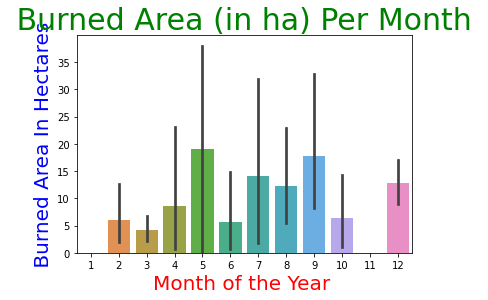

In [142]:
sns.barplot(x = "month", y = "area", data = data_frame)
plt.title(" Burned Area (in ha) Per Month ", c = "g", size = 30)
plt.xlabel("Month of the Year ", c= "r", size = 20)
plt.ylabel(" Burned Area In Hectares ", c = "b", size = 20)
plt. show()

In [143]:
# CREATE NEW DATA FRAME

In [144]:
new_frame = data_frame.loc[:5, :]

In [145]:
new_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
5,8,6,8,1,92,85,488,14,22,29,5,0,0


In [146]:
# DRAW BAR PLOT

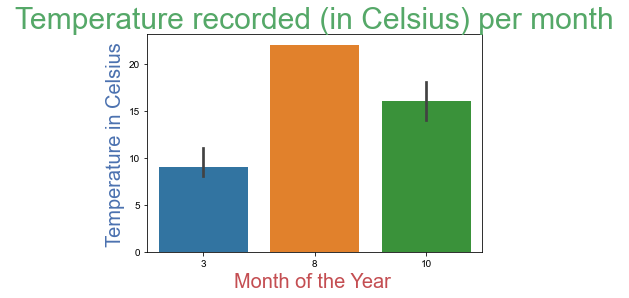

In [147]:
sns.barplot(x = "month", y = "temp", data = new_frame)
sns.set(style = "dark")
plt.title(" Temperature recorded (in Celsius) per month ", c = "g", size = 30)
plt.xlabel("Month of the Year ", c= "r", size = 20)
plt.ylabel(" Temperature in Celsius ", c = "b", size = 20)
plt. show()

In [148]:
# COUNT PLOT

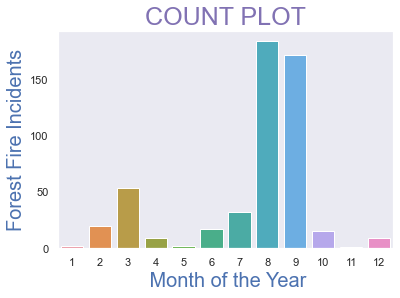

In [149]:
sns.countplot (x = "month", data = data_frame)
sns.set(style="dark")
plt.title("COUNT PLOT", c="m", size=25)
plt.xlabel(" Month of the Year", c ="b", size = 20)
plt.ylabel("Forest Fire Incidents", c="b",size =20)
sns. set_context("talk", font_scale = 1)
plt.show()

In [150]:
# DISPLOT

Text(10.815000000000005, 0.5, 'Count')

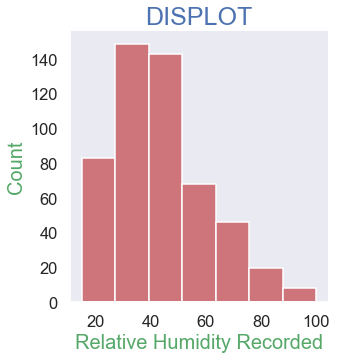

In [151]:
sns.displot (data_frame.RH, bins = 7, color="r")
plt.title("DISPLOT",c="b",size = 25)
plt.xlabel("Relative Humidity Recorded", c= "g", size =20)
plt.ylabel("Count", c="g", size=20)

In [152]:
# HEATMAP

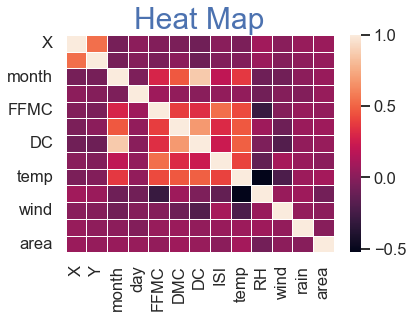

In [153]:
sns.heatmap(data_frame. corr(), cbar = True, linewidth =0.5)
plt.title("Heat Map",color = "b", size = 30)
plt. show()

In [154]:
# SCATTER PLOT

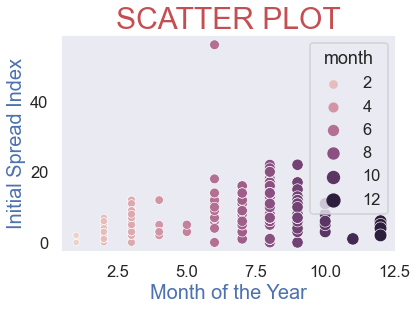

In [155]:
sns.scatterplot(x = "month", y= "ISI", data = data_frame, hue ="month",size="month")
plt.title("SCATTER PLOT", c="r", size=30)
plt.xlabel("Month of the Year", c = "b", size=20)
plt.ylabel("Initial Spread Index", c="b", size= 20)
plt.show()

In [156]:
# PAIR PLOT CREATED USING PREVIOUSLY CREATED DATAFRAME

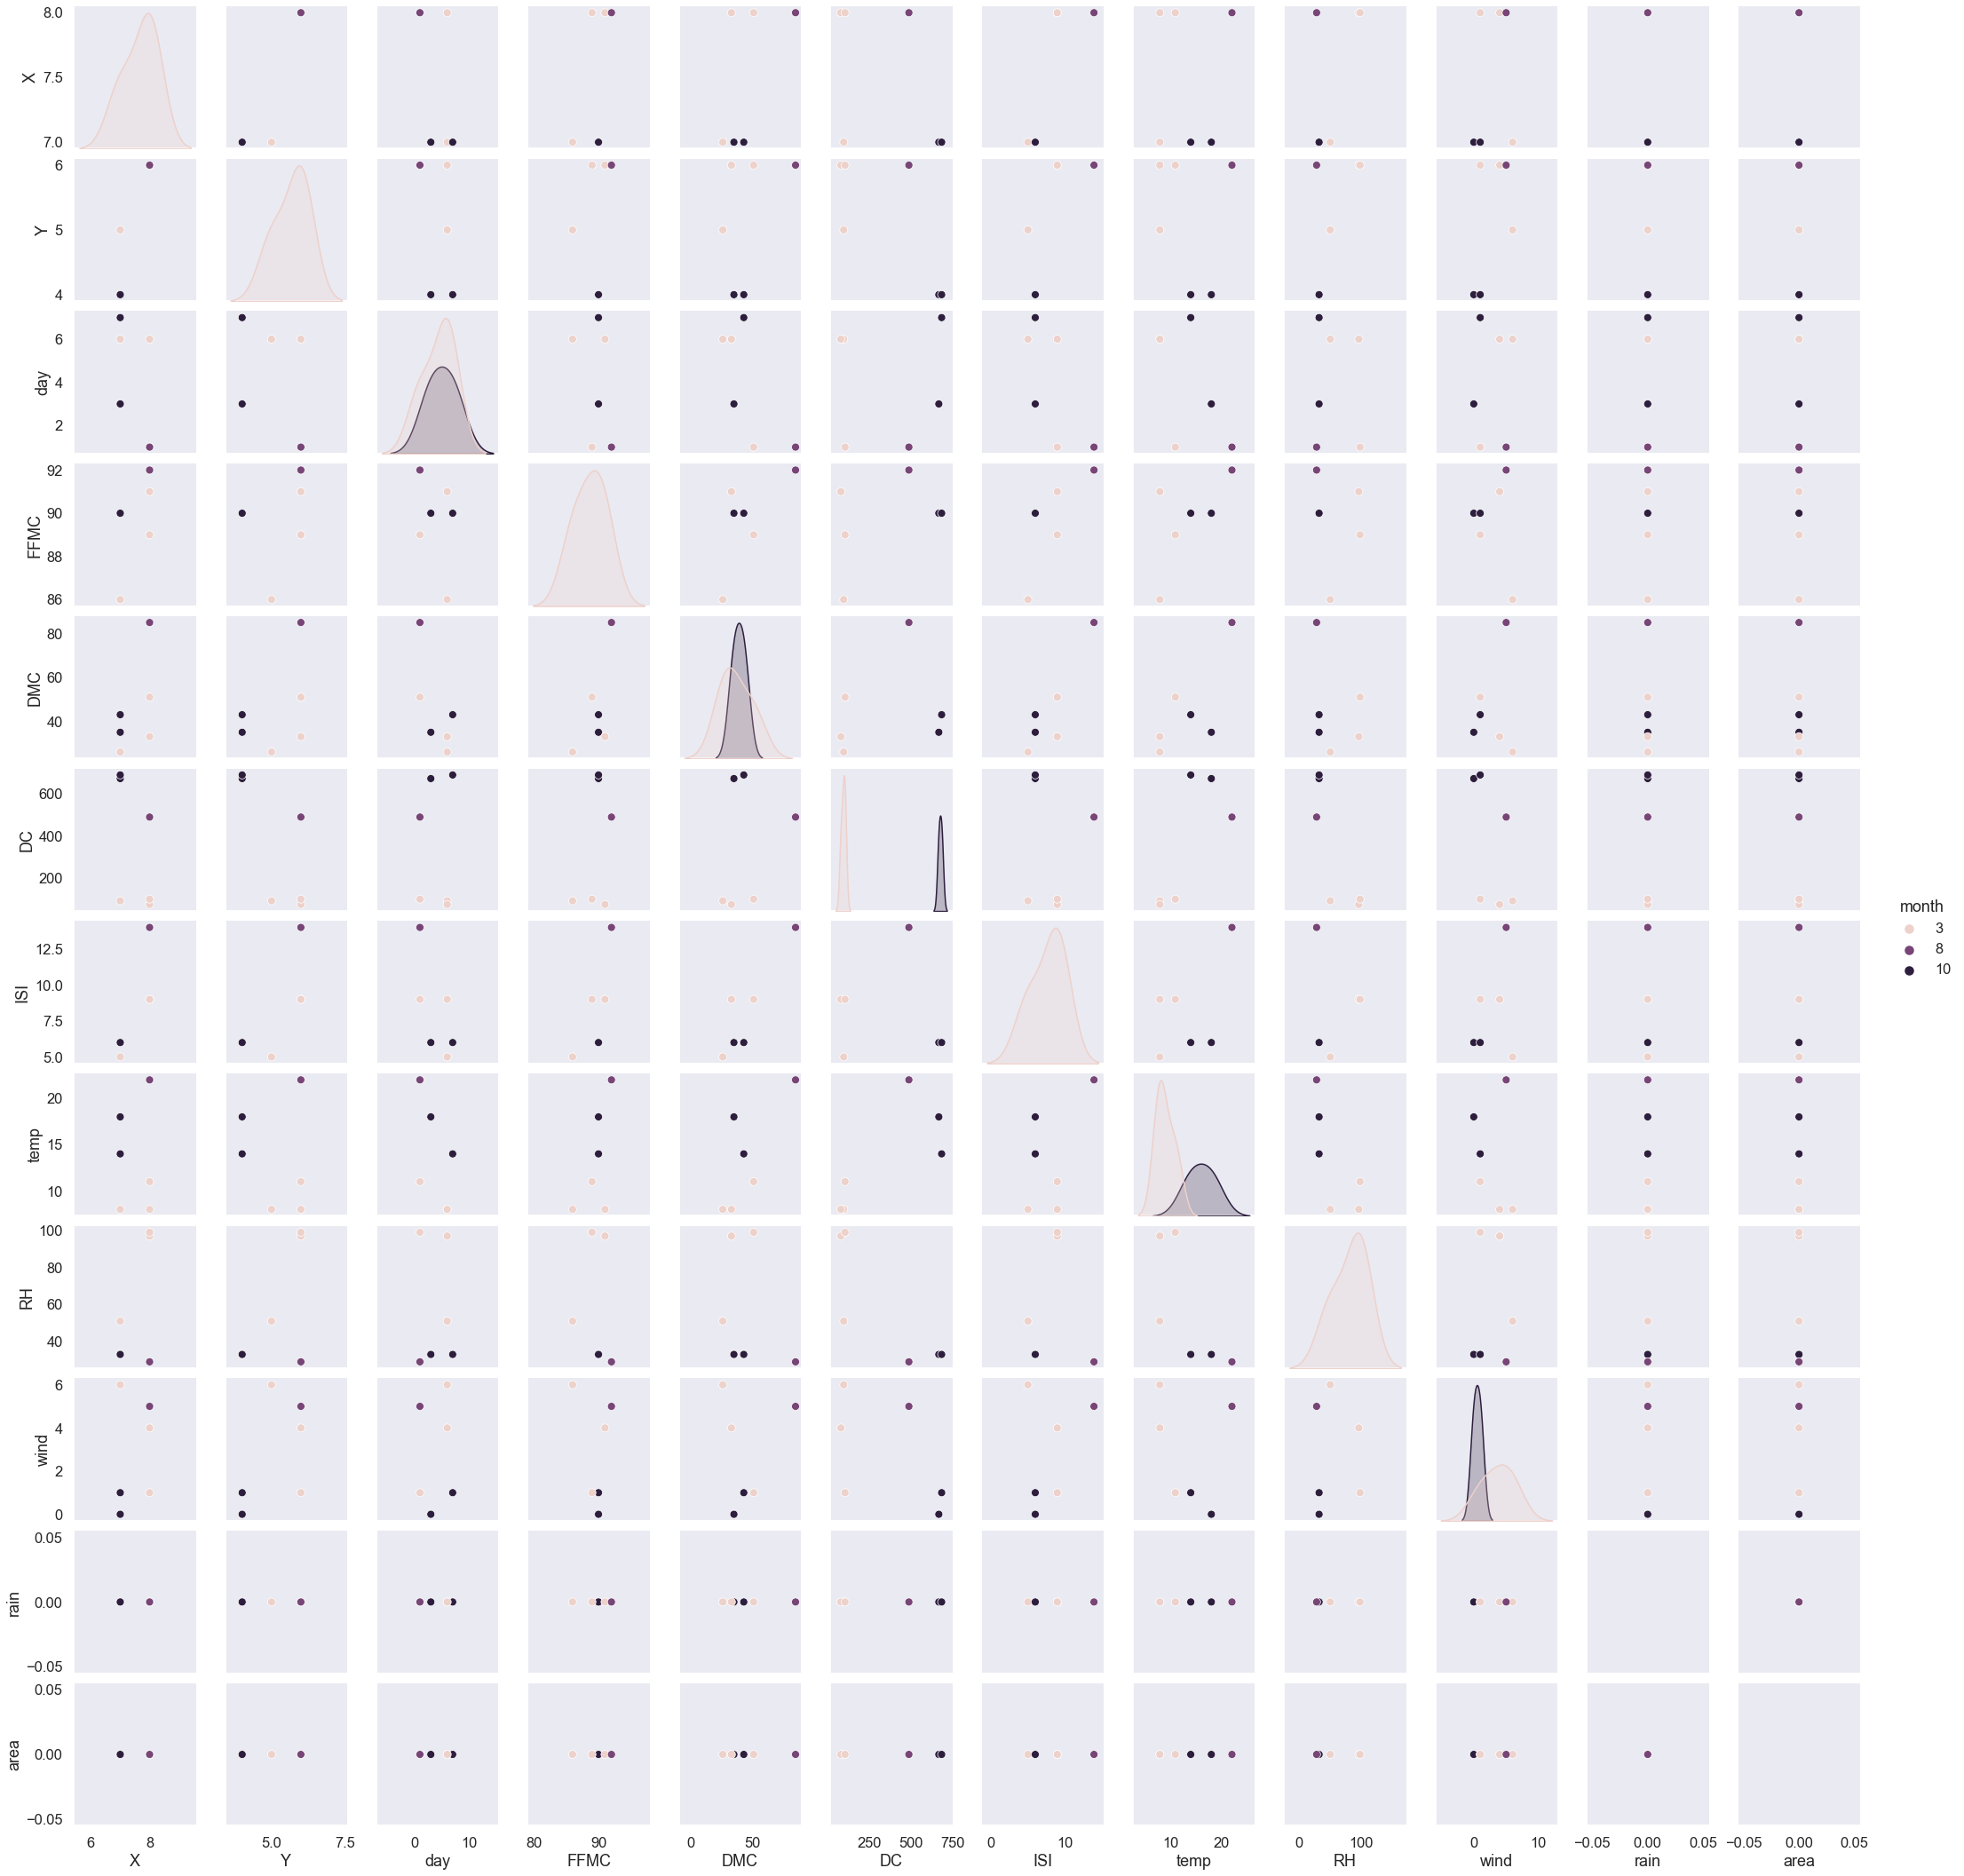

In [157]:
sns.pairplot(new_frame, hue = "month")
plt.show()

In [158]:
# LMPLOT

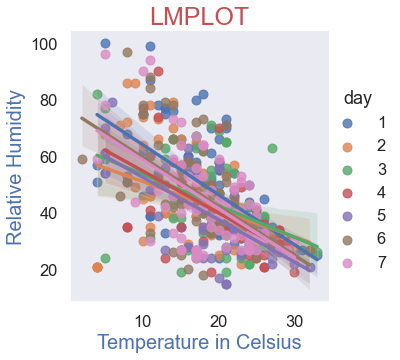

In [159]:
sns.lmplot(x="temp", y="RH", data= data_frame, hue="day")
plt.title("LMPLOT", c="r",size = 25)
plt.xlabel("Temperature in Celsius", c="b", size = 20)
plt.ylabel("Relative Humidity", c="b", size = 20)
plt.show()

In [160]:
# BOX PLOT

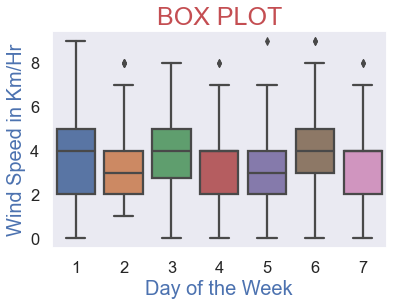

In [161]:
sns. boxplot(x="day", y="wind",data= data_frame )
plt.title("BOX PLOT", c="r", size = 25)
plt.xlabel("Day of the Week", c="b", size = 20)
plt.ylabel("Wind Speed in Km/Hr", c="b", size= 20)
plt.show()

In [162]:
# RELPLOT

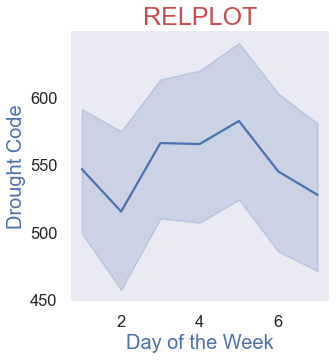

In [163]:
sns. relplot(x="day", y="DC",data= data_frame, kind = "line" )
plt.title("RELPLOT", c="r", size = 25)
plt.xlabel("Day of the Week", c="b", size = 20)
plt.ylabel("Drought Code", c="b", size= 20)
plt.show()

In [164]:
# CAT PLOT

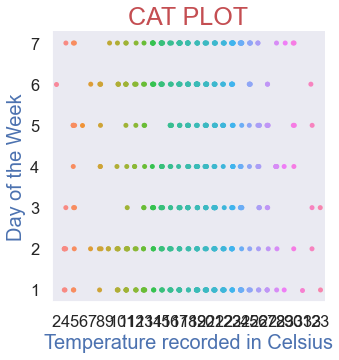

In [165]:
sns. catplot(y="day", x="temp",data= data_frame )
plt.title("CAT PLOT", c="r", size = 25)
plt.ylabel("Day of the Week", c="b", size = 20)
plt.xlabel("Temperature recorded in Celsius", c="b", size= 20)
plt.show()

In [166]:
# CAT PLOT AS VIOLIN

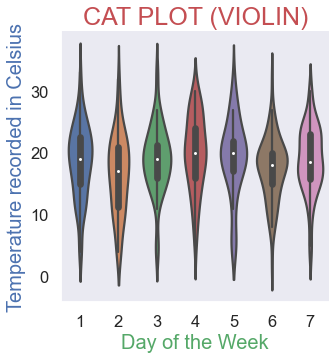

In [167]:
sns. catplot(x="day", y="temp",data= data_frame, kind="violin" )
plt.title("CAT PLOT (VIOLIN)", c="r", size = 25)
plt.xlabel("Day of the Week", c="g", size = 20)
plt.ylabel("Temperature recorded in Celsius", c="b", size= 20)
plt.show()

In [168]:
# LINE PLOT

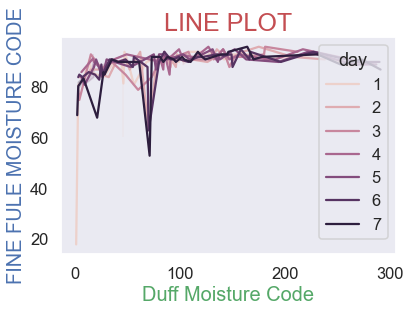

In [169]:
sns.lineplot(y="FFMC", x="DMC",data= data_frame, hue = "day" )
plt.title("LINE PLOT", c="r", size = 25)
plt.xlabel("Duff Moisture Code", c="g", size = 20)
plt.ylabel("FINE FULE MOISTURE CODE", c="b", size= 20)
plt.show()

In [170]:
# STRIP PLOT

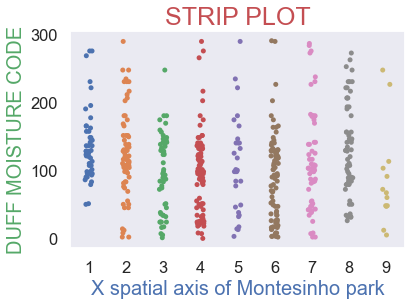

In [171]:
sns.stripplot(x="X", y="DMC",data= data_frame)
plt.title("STRIP PLOT", c="r", size = 25)
plt.xlabel("X spatial axis of Montesinho park", c="b", size = 20)
plt.ylabel("DUFF MOISTURE CODE", c="g", size= 20)
plt.show()

In [172]:
# SWARM PLOT

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed

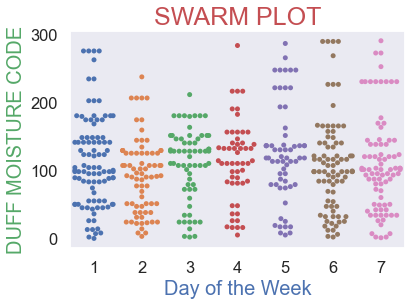

In [173]:
sns.swarmplot(x="day", y="DMC",data= data_frame)
plt.title("SWARM PLOT", c="r", size = 25)
plt.xlabel("Day of the Week", c="b", size = 20)
plt.ylabel("DUFF MOISTURE CODE", c="g", size= 20)
plt.show()

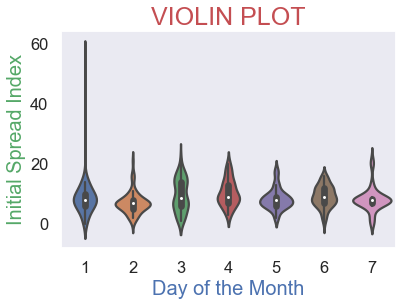

In [174]:
sns.violinplot(x="day", y="ISI",data= data_frame)
plt.title("VIOLIN PLOT", c="r", size = 25)
plt.xlabel("Day of the Month", c="b", size = 20)
plt.ylabel("Initial Spread Index", c="g", size= 20)
plt.show()

In [175]:
# PAL PLOT

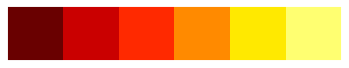

In [176]:
current_palette= sns. color_palette()
sns.palplot(sns. color_palette("hot"))

In [177]:
# DISTRIBUTION PLOT

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


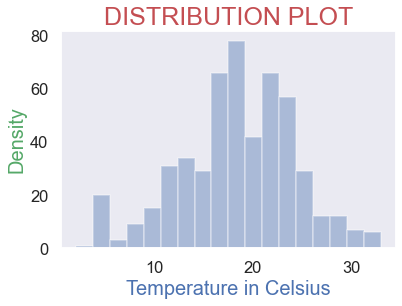

In [178]:
sns.distplot(data_frame["temp"],kde = False)
plt.title("DISTRIBUTION PLOT", c="r", size = 25)
plt.xlabel("Temperature in Celsius", c="b", size = 20)
plt.ylabel("Density", c="g", size= 20)
plt.show()

In [179]:
# JOINT PLOT

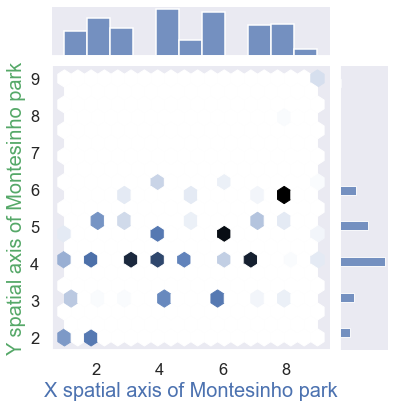

In [180]:
sns.jointplot(x="X", y="Y",data= data_frame, kind= "hex")
plt.xlabel("X spatial axis of Montesinho park", c="b", size = 20)
plt.ylabel("Y spatial axis of Montesinho park", c="g", size= 20)
plt.show()

In [181]:
# KDE PLOT

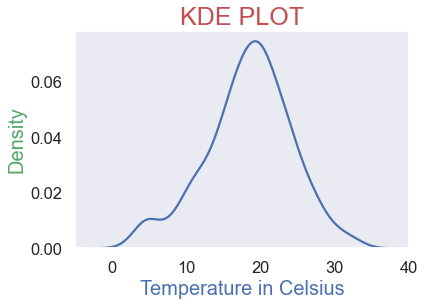

In [182]:
sns.kdeplot(data_frame["temp"])
plt.title("KDE PLOT", c="r", size = 25)
plt.xlabel("Temperature in Celsius", c="b", size = 20)
plt.ylabel("Density", c="g", size= 20)
plt.show()

In [183]:
# RUG PLOT

Text(0.5, 0, 'Drought Code')

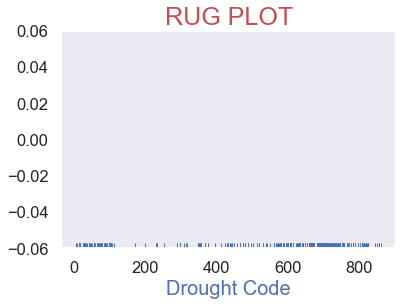

In [184]:
sns. rugplot (data_frame["DC"])
plt.title("RUG PLOT", c="r", size =25)
plt.xlabel("Drought Code", c="b",size = 20)

In [185]:
# CLUSTER MAP

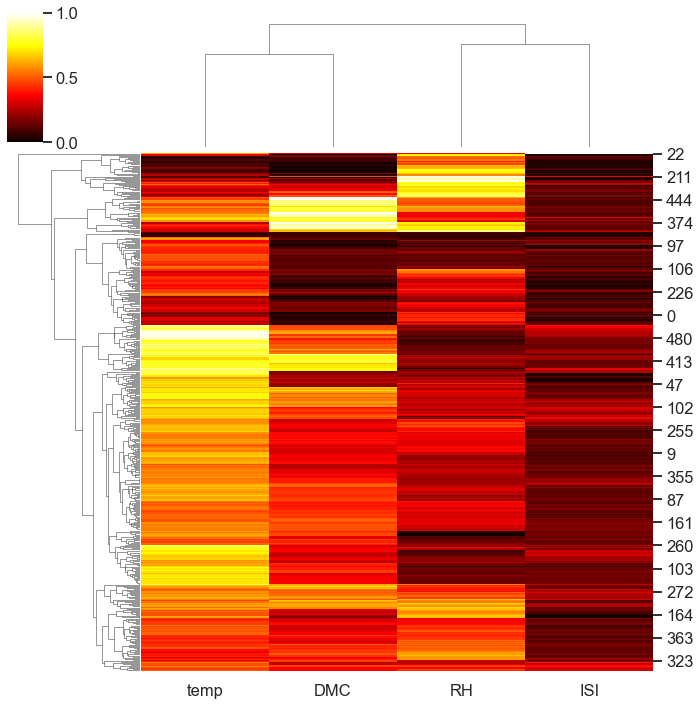

In [186]:
new_frame1 = data_frame.loc[:,["RH","temp","DMC","ISI"]]
sns.clustermap (new_frame1, cmap = "hot", standard_scale =1)

In [187]:
# PAIR GRID 

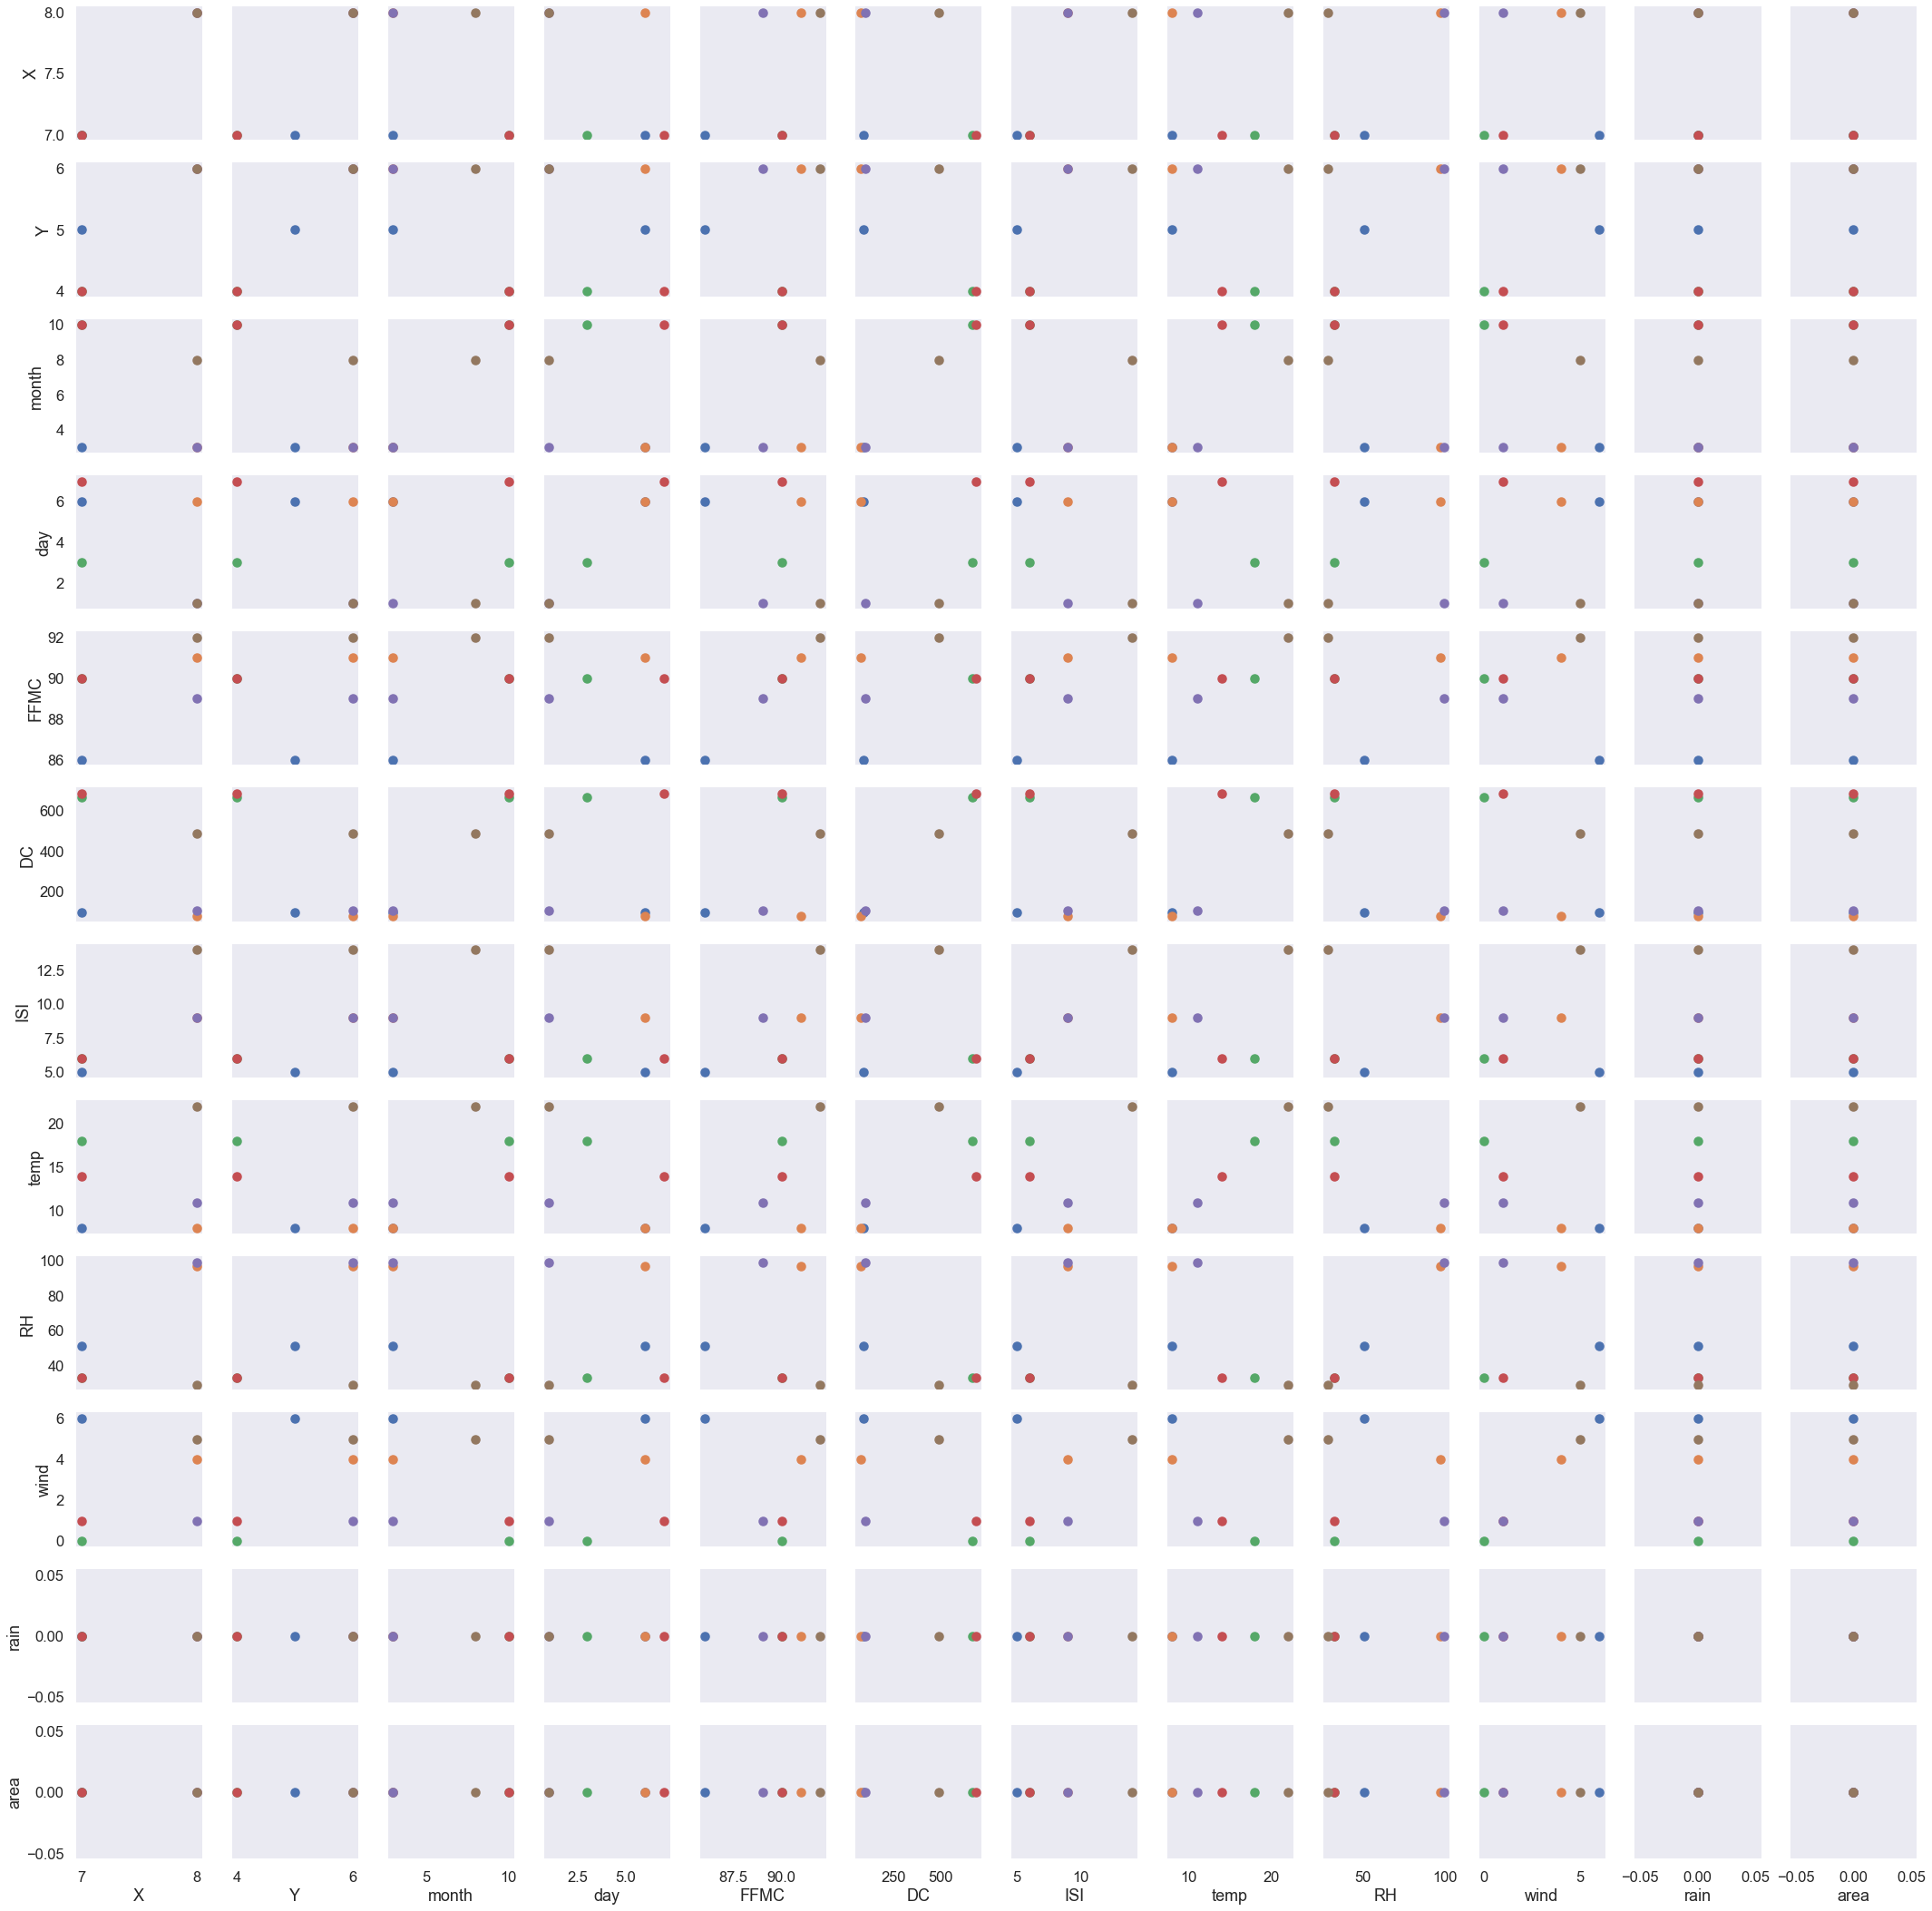

In [188]:
grid=sns. PairGrid(new_frame, hue ="DMC")
grid.map(plt. scatter)

# TYPES OF REGRESSION
## A)  LINEAR REGRESSION

In [189]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [190]:
# SPLITTING FEATURES INTO INDEPENDENT AND DEPENDENT VARIABLES ( X & Y )
x = data_frame.iloc[:,6:7].values
y= data_frame.iloc[:,12].values


In [191]:
# DISPLAY TWO TYPES OF VARIABLES

In [192]:
x

array([[ 94],
       [669],
       [686],
       [ 77],
       [102],
       [488],
       [495],
       [608],
       [692],
       [698],
       [698],
       [713],
       [665],
       [686],
       [699],
       [713],
       [ 80],
       [664],
       [ 70],
       [ 97],
       [692],
       [724],
       [200],
       [537],
       [594],
       [601],
       [668],
       [686],
       [721],
       [728],
       [692],
       [709],
       [706],
       [718],
       [724],
       [730],
       [669],
       [682],
       [686],
       [ 67],
       [366],
       [624],
       [647],
       [698],
       [735],
       [692],
       [686],
       [442],
       [ 64],
       [103],
       [706],
       [631],
       [654],
       [654],
       [661],
       [706],
       [730],
       [691],
       [ 34],
       [ 43],
       [102],
       [102],
       [466],
       [631],
       [638],
       [661],
       [668],
       [668],
       [668],
       [ 77],
       [ 97],
      

In [193]:
y 

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    1,   

In [194]:
# SPLITTING VALUES INTO TRAINING DATA AND TEST DATA

In [195]:
# import module from splitting function
from sklearn.model_selection import train_test_split
# splitting as x_train,y_train,x_test,y_test
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 1/3, random_state = 0)

In [196]:
# DISPLAYING SPLITTING X_TRAIN , X_TEST , Y_TRAIN , Y_TEST

In [197]:
x_train

array([[700],
       [631],
       [520],
       [817],
       [621],
       [671],
       [560],
       [ 86],
       [689],
       [171],
       [430],
       [ 86],
       [752],
       [783],
       [631],
       [589],
       [232],
       [807],
       [704],
       [ 74],
       [751],
       [631],
       [672],
       [102],
       [649],
       [ 16],
       [658],
       [ 80],
       [751],
       [349],
       [601],
       [758],
       [587],
       [100],
       [825],
       [488],
       [ 70],
       [ 25],
       [692],
       [578],
       [654],
       [433],
       [672],
       [744],
       [570],
       [706],
       [567],
       [349],
       [668],
       [783],
       [684],
       [686],
       [614],
       [855],
       [686],
       [698],
       [713],
       [664],
       [ 86],
       [855],
       [758],
       [692],
       [ 67],
       [700],
       [674],
       [753],
       [764],
       [ 55],
       [745],
       [ 80],
       [ 97],
      

In [198]:
x_test

array([[103],
       [376],
       [807],
       [699],
       [609],
       [713],
       [100],
       [605],
       [643],
       [ 30],
       [666],
       [349],
       [316],
       [ 86],
       [855],
       [529],
       [629],
       [633],
       [ 18],
       [423],
       [682],
       [751],
       [ 43],
       [807],
       [825],
       [686],
       [692],
       [671],
       [777],
       [724],
       [686],
       [613],
       [789],
       [643],
       [690],
       [601],
       [ 67],
       [647],
       [674],
       [587],
       [665],
       [647],
       [714],
       [698],
       [758],
       [668],
       [795],
       [724],
       [654],
       [745],
       [614],
       [795],
       [102],
       [783],
       [807],
       [669],
       [ 26],
       [665],
       [745],
       [631],
       [624],
       [513],
       [297],
       [728],
       [735],
       [674],
       [631],
       [613],
       [ 43],
       [605],
       [647],
      

In [199]:
y_train

array([  0,   0,   0,   0,  10,  14,   2,   1,  49,   0,   0,  31,   0,
         0,   0,  10,   0,  28,   2,   0,   0,   0,   1,   7,   9,   5,
         9,   0,   0,  17,   0,  14,  26,   0,   3,   0,   0,   0,  11,
         0,   1,   1,   2,   5,   2,   0,   0,  24,   0,   1,   6,   0,
         0,   7,   0,   0,  35,   0,   0,   9,   0,   0,   0,   0,   0,
         0,   0,   4,   3,   0,   2,   0,   0,   3,   0,  39,   0,  86,
         0,   8,   3,   5,   0,   0,   0,   4,   0, 103,   0,   0,   0,
         0,   0,  11, 746,   3,   0,  31,   0,   0,   0,   0,   0,  13,
         6,  30,   0,   0,   0,   1,   0,   0,   0,  26,   0,   5,  20,
         1,  28,   0,   8,  28,   1,  13, 154,   1,   0,   0,  29,   0,
        37,   0,   0,   2,   0,   0,   0,  11,   0,   0,   0,   1,   0,
         0,   6,   0,  64,   1,   0,   0,  10,   0,   1,   1,   0,   1,
         0,   0,   0, 212,   8,   1,   3,   2,   3,   0,   0,   0,   0,
         0,   0,   4,  49,   0,   0,   2,   0,   9,   0,   0,   

In [200]:
y_test

array([  27,    0,    2,   88,    2,    0,    1,    0,   16,    0,    2,
         22,   10,    0,   18,    0,    1,   43,    1,    7,    0,    3,
          4,    5,   70,   24,    0,    0,    0,    0,    0,    3,    0,
          8,    5,  196,    0,    1, 1090,    0,   54,    0,    0,    0,
          0,    1,    6,    0,    1,    2,    5,   11,    0,   34,    6,
          0,    0,    0,    7,   32,    0,    0,    8,   48,   37,  200,
          0,    3,    0,   46,   10,    0,    0,    4,    2,    0,    0,
          0,    5,    0,    3,    0,    0,    0,    0,   11,    2,    6,
          2,    0,   40,  105,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    1,    0,   24,    0,   82,    0,   71,    2,
          4,    0,    0,    0,   15,   24,   11,    0,    3,    3,    0,
          3,   10,    0,    3,    0,    1,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    6,   14,   95,    0,    4,
          0,    0,    7,   16,    0,   16,    0,   

In [201]:
# IMPORTING LINEAR REGRESSION AS LINEAR MODEL

In [202]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [203]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

In [204]:
# PREDICTION OF TRAINING AND TEST SET RESULTS

In [205]:
x_pred

array([11.5054198 , 11.10664622, 10.46514089, 12.18160109, 11.04885294,
       11.33781931, 10.69631398,  7.95691286, 11.4418472 ,  8.44815568,
        9.94500144,  7.95691286, 11.80594481, 11.98510396, 11.10664622,
       10.86391447,  8.80069464, 12.12380781, 11.52853711,  7.88756094,
       11.80016549, 11.10664622, 11.34359863,  8.0493821 , 11.21067411,
        7.55235995, 11.26268805,  7.9222369 , 11.80016549,  9.47687593,
       10.9332664 , 11.84062078, 10.85235582,  8.03782344, 12.2278357 ,
       10.28020242,  7.86444363,  7.6043739 , 11.45918518, 10.80034187,
       11.23957074,  9.96233942, 11.34359863, 11.7597102 , 10.75410725,
       11.54009576, 10.73676927,  9.47687593, 11.32048132, 11.98510396,
       11.41295056, 11.42450922, 11.00839765, 12.40121552, 11.42450922,
       11.49386114, 11.58055105, 11.29736402,  7.95691286, 12.40121552,
       11.84062078, 11.45918518,  7.84710564, 11.5054198 , 11.35515729,
       11.81172414, 11.87529674,  7.77775372, 11.76548952,  7.92

In [206]:
y_pred

array([ 8.05516143,  9.63291777, 12.12380781, 11.49964047, 10.97950102,
       11.58055105,  8.03782344, 10.95638371, 11.17599814,  7.63327054,
       11.30892267,  9.47687593,  9.28615813,  7.95691286, 12.40121552,
       10.51715484, 11.09508756, 11.11820487,  7.56391861,  9.90454615,
       11.40139191, 11.80016549,  7.70840179, 12.12380781, 12.2278357 ,
       11.42450922, 11.45918518, 11.33781931, 11.950428  , 11.64412365,
       11.42450922, 11.00261833, 12.01977992, 11.17599814, 11.44762652,
       10.9332664 ,  7.84710564, 11.19911545, 11.35515729, 10.85235582,
       11.30314334, 11.19911545, 11.58633038, 11.49386114, 11.84062078,
       11.32048132, 12.05445589, 11.64412365, 11.23957074, 11.76548952,
       11.00839765, 12.05445589,  8.0493821 , 11.98510396, 12.12380781,
       11.32626065,  7.61015323, 11.30314334, 11.76548952, 11.10664622,
       11.06619093, 10.4246856 ,  9.17635091, 11.66724096, 11.70769625,
       11.35515729, 11.10664622, 11.00261833,  7.70840179, 10.95

In [207]:
# CHECKING ACCURACY OF TRAINING AND TEST DATA

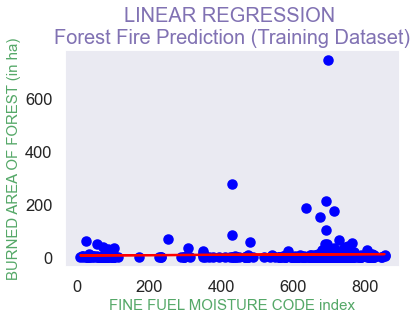

In [208]:
# VISUALIZATION OF TRAINING DATA 
plt.scatter (x_train, y_train, color = "blue")
plt . plot(x_train , x_pred , color="red")    
plt. title("LINEAR REGRESSION \nForest Fire Prediction (Training Dataset)", color = "m", size = 20)
plt.xlabel("FINE FUEL MOISTURE CODE index", color = "g", size = 15)
plt.ylabel("BURNED AREA OF FOREST (in ha)", color = "g", size = 15)
plt.show()

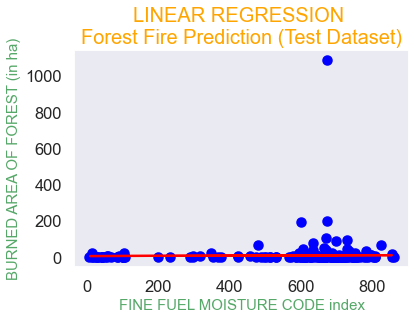

In [209]:
# VISUALIZATION OF TEST DATA 
plt.scatter (x_test, y_test, color = "blue")
plt. plot (x_train, x_pred, color ="red")
plt. title("LINEAR REGRESSION \nForest Fire Prediction (Test Dataset)", color = "orange", size = 20)
plt.xlabel("FINE FUEL MOISTURE CODE index", color = "g", size = 15)
plt.ylabel("BURNED AREA OF FOREST (in ha)", color = "g", size = 15)
plt.show()

In [210]:
# VISUALIZATION TRAINING AND TEST DATA
print ("TRAINING DATA ACCURACY : ", regressor.score(x_train,y_train)) # training data accuracy
print ("TESTING DATA ACCURACY : ", regressor.score(x_test,y_test)) # testing data accuracy

TRAINING DATA ACCURACY :  0.0009067401897063787
TESTING DATA ACCURACY :  -0.0025484370250059563


In [211]:
# entering inputs
DMC = input("Duff Moisture Code Index: ")
input_data = DMC
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print("BURNED AREA (in ha) will be : " , prediction)

Duff Moisture Code Index: 500
BURNED AREA (in ha) will be :  [10.34955435]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)



## B) MULTIPLE LINEAR REGRESSION

In [212]:
data_set

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86,26,94,5,8,51,6,0,0
1,7,4,10,3,90,35,669,6,18,33,0,0,0
2,7,4,10,7,90,43,686,6,14,33,1,0,0
3,8,6,3,6,91,33,77,9,8,97,4,0,0
4,8,6,3,1,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81,56,665,1,27,32,2,0,6
513,2,4,8,1,81,56,665,1,21,71,5,0,54
514,7,4,8,1,81,56,665,1,21,70,6,0,11
515,1,4,8,7,94,146,614,11,25,42,4,0,0


In [213]:
#Extracting Independent and dependent Variable

In [214]:
x = data_frame.iloc[:,:-1].values
y = data_frame.iloc[:,-1].values

In [215]:
#Categorical data  
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder(drop='first', dtype=int)
ct = ColumnTransformer([('categorical_encoding', encoder, [3])], remainder='passthrough')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,3] = labelencoder_x.fit_transform(x[:,3])
onehotencoder=OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [216]:
print("TRAINING SCORE: ", regressor.score(x_train, y_train))
print("TESTING SCORE: ", regressor.score (x_test, y_test))

TRAINING SCORE:  0.0009067401897063787
TESTING SCORE:  -0.0025484370250059563


## C) POLYNOMIAL REGRESSION

In [217]:
data_frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86,26,94,5,8,51,6,0,0
1,7,4,10,2,90,35,669,6,18,33,0,0,0
2,7,4,10,6,90,43,686,6,14,33,1,0,0
3,8,6,3,5,91,33,77,9,8,97,4,0,0
4,8,6,3,0,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81,56,665,1,27,32,2,0,6
513,2,4,8,0,81,56,665,1,21,71,5,0,54
514,7,4,8,0,81,56,665,1,21,70,6,0,11
515,1,4,8,6,94,146,614,11,25,42,4,0,0


In [218]:
# SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLE AS X & Y

In [219]:
x = data_frame. iloc [:,6:7].values
y = data_frame.iloc [:, 12]. values

In [220]:
# IMPORTING LINEAR REGRESSION AS LINEAR MODEL

In [221]:
from sklearn.linear_model import LinearRegression
lin_regs = LinearRegression()#Fitting the Linear Regression to the dataset
lin_regs. fit(x,y)

LinearRegression()

In [222]:
#Fitting the Polynomial regression to the dataset 

In [223]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs = PolynomialFeatures(degree = 5) #change the degree for the correct output 
x_poly = poly_regs.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [224]:
y_pred = lin_reg_2.predict(x_poly)

In [225]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,5.694649
1,0,16.654655
2,0,16.616913
3,0,5.429149
4,0,5.829545
...,...,...
512,6,16.638260
513,54,16.638260
514,11,16.638260
515,0,15.818457


In [226]:
#Visulaizing the result for Linear Regression model 

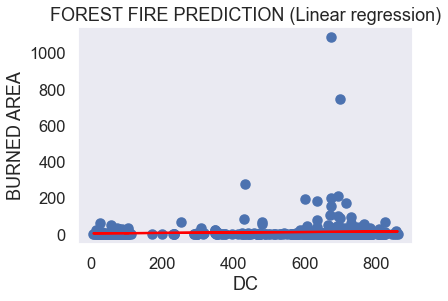

In [227]:
plt.scatter(x,y,color ="b")
plt.plot(x, lin_regs. predict(x), color = "red")
plt.title("FOREST FIRE PREDICTION (Linear regression)")
plt.xlabel("DC")
plt.ylabel("BURNED AREA")
plt.show()

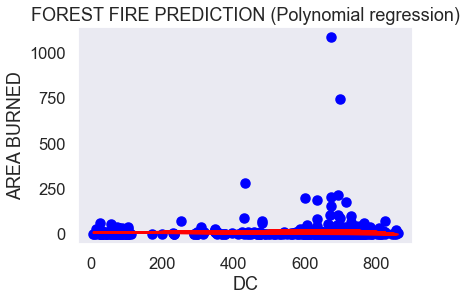

In [228]:
#Visulaizing the result for Polynomial Regression 
plt.scatter(x,y, color = "blue")
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color = "red")
plt.title("FOREST FIRE PREDICTION (Polynomial regression)")
plt.xlabel("DC")
plt.ylabel("AREA BURNED")
plt.show()

In [ ]:
# Predicting a new result with Linear Regression after converting predict variable to 2D array
pred = input("ENTER Value: ")
predarray = np.array([[pred]])
lin_regs.predict(predarray)

In [ ]:
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = input("ENTER Value: ")
pred2array = np.array([[pred2]])
lin_reg_2.predict(poly_regs.fit_transform(pred2array))

In [ ]:
# entering inputs

dc = input("Drought Code: ")
input_data = dc
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=lin_regs.predict(input_data_reshaped)
print("BURNED AREA (in ha) will be : " , prediction)

## D) SUPPORT VECTOR MACHINE (SVM)

In [ ]:
data_frame

In [ ]:
#Extracting Independent and dependent Variable
x = data_frame.iloc[:,0:12].values
y= data_frame.iloc[:,12].values



In [ ]:
# Splitting the dataset into training and test set. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,3] = labelencoder_x.fit_transform(x[:,3])
onehotencoder=OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [ ]:
#Feature Scaling  
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
#Predicting the test set result 
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

In [ ]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = classifier .predict(x_test)

In [ ]:
# Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('Forest Fire Prediction (Training set)')  
plt.xlabel('DC & ISI Indexes')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show()   

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title(' Forest fire prediction(Test set)')  
plt.xlabel('DC & ISI Indexes')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show()  

In [ ]:
# check the accuracy on the training set
print("TRAINING SCORE: ", classifier.score(x_train, y_train))
print("TESTING SCORE:", classifier.score(x_test, y_test))

## E) K - NEAREST NEIGHBOR

In [ ]:
#Extracting Independent and dependent Variable  
x = data_frame.iloc[:,[6,7]].values
y= data_frame.iloc[:,10].values

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,1] = labelencoder_x.fit_transform(x[:,1])
onehotencoder=OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [ ]:
#Fitting K-NN classifier to the training set 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

In [ ]:
#Predicting the test set result  
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

In [ ]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title(' Forest Fire Prediction(Training set)')  
plt.xlabel('Temp & RH values')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show() 

In [ ]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('Forest Fire Prediction(Test set)')  
plt.xlabel('Temp & RH values')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show() 

In [ ]:
print("TRAINING SCORE: ", classifier.score(x_train, y_train))

In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Test Accuracy:",result2)

## F) LOGISTIC REGRESSION

In [ ]:
#importing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
z=data_frame.drop(columns=["month","day"],axis=1)
z

In [ ]:
x = z.iloc[:,[4,5]].values
m= z.iloc[:,10].values
y=m.astype(int)

In [ ]:
x

In [ ]:
y

In [ ]:
#for printing first 5 ros in the data set
z.head()

In [ ]:
#For printing last 5 rows in the datase
z.tail()

In [ ]:
# for checking how many rows and columns in the dataset
z.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,1] = labelencoder_x.fit_transform(x[:,1])
onehotencoder=OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [ ]:
#some more information about data
z.info()

In [ ]:
#checking for missing values
z.isnull().sum()

In [ ]:
z.isnull().sum().sum()

In [ ]:
#statistical measure of data
z.describe()

In [ ]:
#finding the desctribution of the target value
#splitting the features and target
z["area"].value_counts()

In [ ]:
y

In [ ]:
y_train

In [ ]:
#splitting data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 2)

In [ ]:
print(x.shape, x_train.shape,x_test.shape)

In [ ]:
#Model Training logistic Regression
model = LogisticRegression()

In [ ]:
#training the logistic Regression model with training data
model.fit(x_train,y_train)

In [ ]:
#model Evaluation
#accuracy score
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('DC & ISI indexes')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('DC & ISI indexes')  
plt.ylabel('Area Burned')  
plt.legend()  
plt.show()  

In [ ]:
print("Accuracy on Training data: ", training_data_accuracy)

In [ ]:
print("Accuracy on Test data:",test_data_accuracy)

## K -Nearest Neighbor model predicts better results compared to other regression models